<a href="https://colab.research.google.com/github/JulieWang417/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
def mean_list(l):
  x = 0
  for i in l:
    x += i
  return x/len(l)


In [25]:
Sales = [3505,2400,3027,2798,3700,3250,2689]
mean_list(Sales)

3052.714285714286

In [26]:
#using numpy to check 
import numpy as np
np.mean(Sales)

3052.714285714286

In [0]:

# calculate mean
m = sum(Sales) / len(Sales)

# calculate variance using a list comprehension
var_res = sum((xi - m) ** 2 for xi in Sales) / len(Sales)



In [0]:
def variance_list(l):
  m = sum(l) / len(l)
  variance = 0
  for i in l:
    variance += (i - m) ** 2
  return variance / len(l)

In [29]:
print(variance_list(Sales))
np.var(Sales)

183761.06122448976


183761.06122448976

In [0]:
import math
def std_list(l):
  m = sum(l) / len(l)
  variance = 0
  for i in l:
    variance += (i - m) ** 2
  return math.sqrt(variance / len(l))

In [31]:
print(std_list(Sales))
np.std(Sales)

428.67360686714756


428.67360686714756

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [32]:
customers_numbers = [127,80,105,92,120,115,93]
np.cov(customers_numbers,Sales)

array([[   290.95238095,   7604.35714286],
       [  7604.35714286, 214387.9047619 ]])

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [33]:
# the standard deviation of customers who entered the store last week
print(std_list(customers_numbers))

15.792015549069118


In [34]:
# correlation coefficient of both sales and customers
corr = np.cov(customers_numbers,Sales)/(std_list(customers_numbers) * std_list(Sales))
corr

array([[ 0.04297913,  1.12330631],
       [ 1.12330631, 31.66911826]])

In [0]:
import pandas as pd
df = pd.DataFrame({'customers_numbers':customers_numbers,'sales_numbers':Sales})

In [36]:
df.corr()

,customers_numbers,sales_numbers
customers_numbers,1.000000,0.962834
sales_numbers,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [37]:
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv', index_col=0)
titanic.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1


In [38]:
titanic.describe()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
count,1309.000000,1309.000000,1310.000000,1309.000000,1309.000000,1308.000000,121.000000,1310.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917,0.225191
std,0.837836,0.486055,12.878277,1.041658,0.865560,51.758668,97.696922,0.417867
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,72.000000,0.000000
50%,3.000000,0.000000,29.881135,0.000000,0.000000,14.454200,155.000000,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,256.000000,0.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


In [39]:
titanic.var()

pclass                 0.701969
survived               0.236250
age                  165.850021
sibsp                  1.085052
parch                  0.749195
fare                2678.959738
body                9544.688567
has_cabin_number       0.174613
dtype: float64

In [40]:
titanic.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [41]:
titanic.corr()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [0]:
k = np.array([2,4])
x = np.array([-4,2])
 

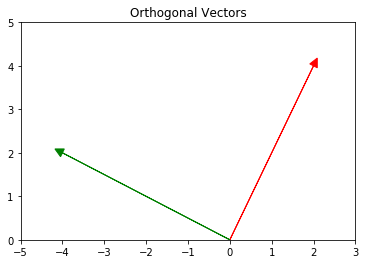

In [43]:
# Plot the Scaled Vectors
import matplotlib.pyplot as plt

plt.arrow(0,0, k[0], k[1],head_width=.2, head_length=0.2, color ='red')
plt.arrow(0,0, x[0], x[1],head_width=.2, head_length=0.2, color ='green')
plt.xlim(-5,3)          
plt.ylim(0,5)
plt.title("Orthogonal Vectors")
plt.show()

In [44]:
np.dot(x, k)

0

Two vectors are orthogonal to each other if their dot product will be zero.

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [45]:
a = np.array([-5,3,7]).T
b = np.array([6,-8,2]).T
a.shape

(3,)

In [46]:
np.dot(a,b)

-40

a & b are not orthognonal vector, since their dot product is not zero.

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
c = np.array([2,-15,6,20])
MC = np.mat(c)

$||c||^2$ is :

In [48]:
from numpy import linalg as LA
LA.norm(c) ** 2

665.0

$c \cdot c$ is:

In [49]:
c * c

array([  4, 225,  36, 400])

$c^{T}c$  is :

In [50]:
MC.T * MC

matrix([[   4,  -30,   12,   40],
        [ -30,  225,  -90, -300],
        [  12,  -90,   36,  120],
        [  40, -300,  120,  400]])

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}


a linear combination of scalars and unit vectors of d and e:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
= 2\begin{bmatrix} 1 \\ 0\end{bmatrix} + 12\begin{bmatrix} 0 \\ 1\end{bmatrix}
\qquad e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix} = 2\begin{bmatrix} 1\\0\\0\end{bmatrix} + 11\begin{bmatrix} 0\\1\\0\end{bmatrix} - 8\begin{bmatrix} 0\\0\\1\end{bmatrix}
\end{align} 

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
f = np.array([4,12,11,9,2])
norm_f = LA.norm(f)

In [52]:
f_hat = f/norm_f
f_hat

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

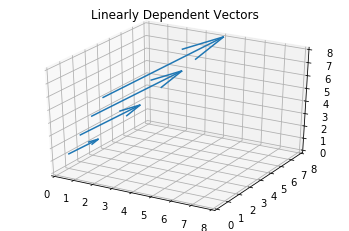

In [53]:
# vectors that are linearly dependent
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

soa = np.array([[0, 1, 1, 1, 1, 1], [0, 2, 2, 2, 2, 2],
                [0, 3, 3, 3, 3, 3], [0, 4, 4, 4, 4, 4]])

X, Y, Z, U, V, W = zip(*soa)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W)
ax.set_xlim([0, 8])
ax.set_ylim([0, 8])
ax.set_zlim([0, 8])

ax.set_title("Linearly Dependent Vectors")
plt.show()

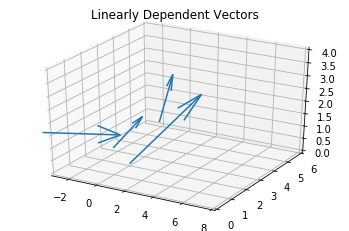

In [54]:
# vectors that are linearly independent
soa1 = np.array([[0, 1, 1, 1, 1, 1], [0, 2, 0, 2, 3, 2],
                [0, -3, 3, 4, 1, 0], [0, 4, 1, 1, 0, 2]])

X, Y, Z, U, V, W = zip(*soa1)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W)
ax.set_xlim([-3, 8])
ax.set_ylim([0, 6])
ax.set_zlim([0, 4])

plt.title("Linearly Dependent Vectors")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

span {(1, 2), (4, 8)} is : {(x, 2 x) : x element R}

The span is c1 * g, c1 is any 

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

{(x-y+4z, 2x+8z, 3x+7y+2z) : x , y, z are elements of R}

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



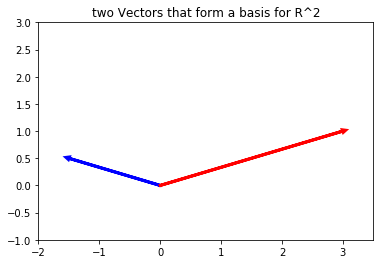

In [55]:
plt.xlim(-2,3.5)          
plt.ylim(-1,3)

# Original Vector
a = [-1.5,.5] 
b = [3, 1]

# Plot Vectors
plt.arrow(0,0, a[0], a[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, b[0], b[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("two Vectors that form a basis for R^2")
plt.show()

## 6.2 What does it mean to form a basis?

Let V be a vector space. A linearly
independent spanning set for V is called a basis.

In other words, B is a basis if its elements are linearly independent and every element of V is a linear combination of elements of B. In more general terms, a basis is a linearly independent spanning set.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

**The Rank of P is 3.**

## 7.2 What does the rank of a matrix tell us?

if we say that a linear operator has a rank p, it means that the range of the linear operator is a p dimensional space. 

From a matrix algebra point of view, column rank denotes the number of independent columns of a matrix while row rank denotes the number of independent rows of a matrix. 

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

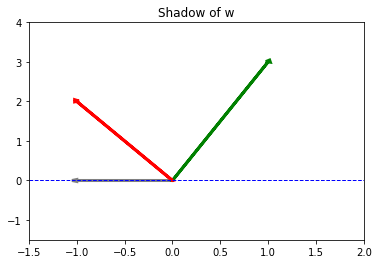

In [56]:

plt.xlim(-1.5,2)          
plt.ylim(-1.5,4)

# Original Vector
v = [1,3] 
w = [-1,2]
proj = [-1,0]

# Get Vals for L
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0, 0, proj[0], proj[1], linewidth=3, head_width=.05, head_length=0.05, color ='gray')
plt.arrow(0, 0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("Shadow of w")
plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

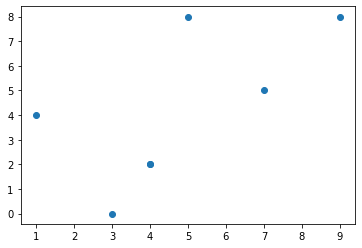

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()